In [4]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the dataset
loan_data = pd.read_csv('./Loan.csv')

# Display first few rows
loan_data.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
# Checking the structure of the dataset
loan_data.info()

# Checking for missing values
loan_data.isnull().sum()

# Summary statistics for numerical features
loan_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


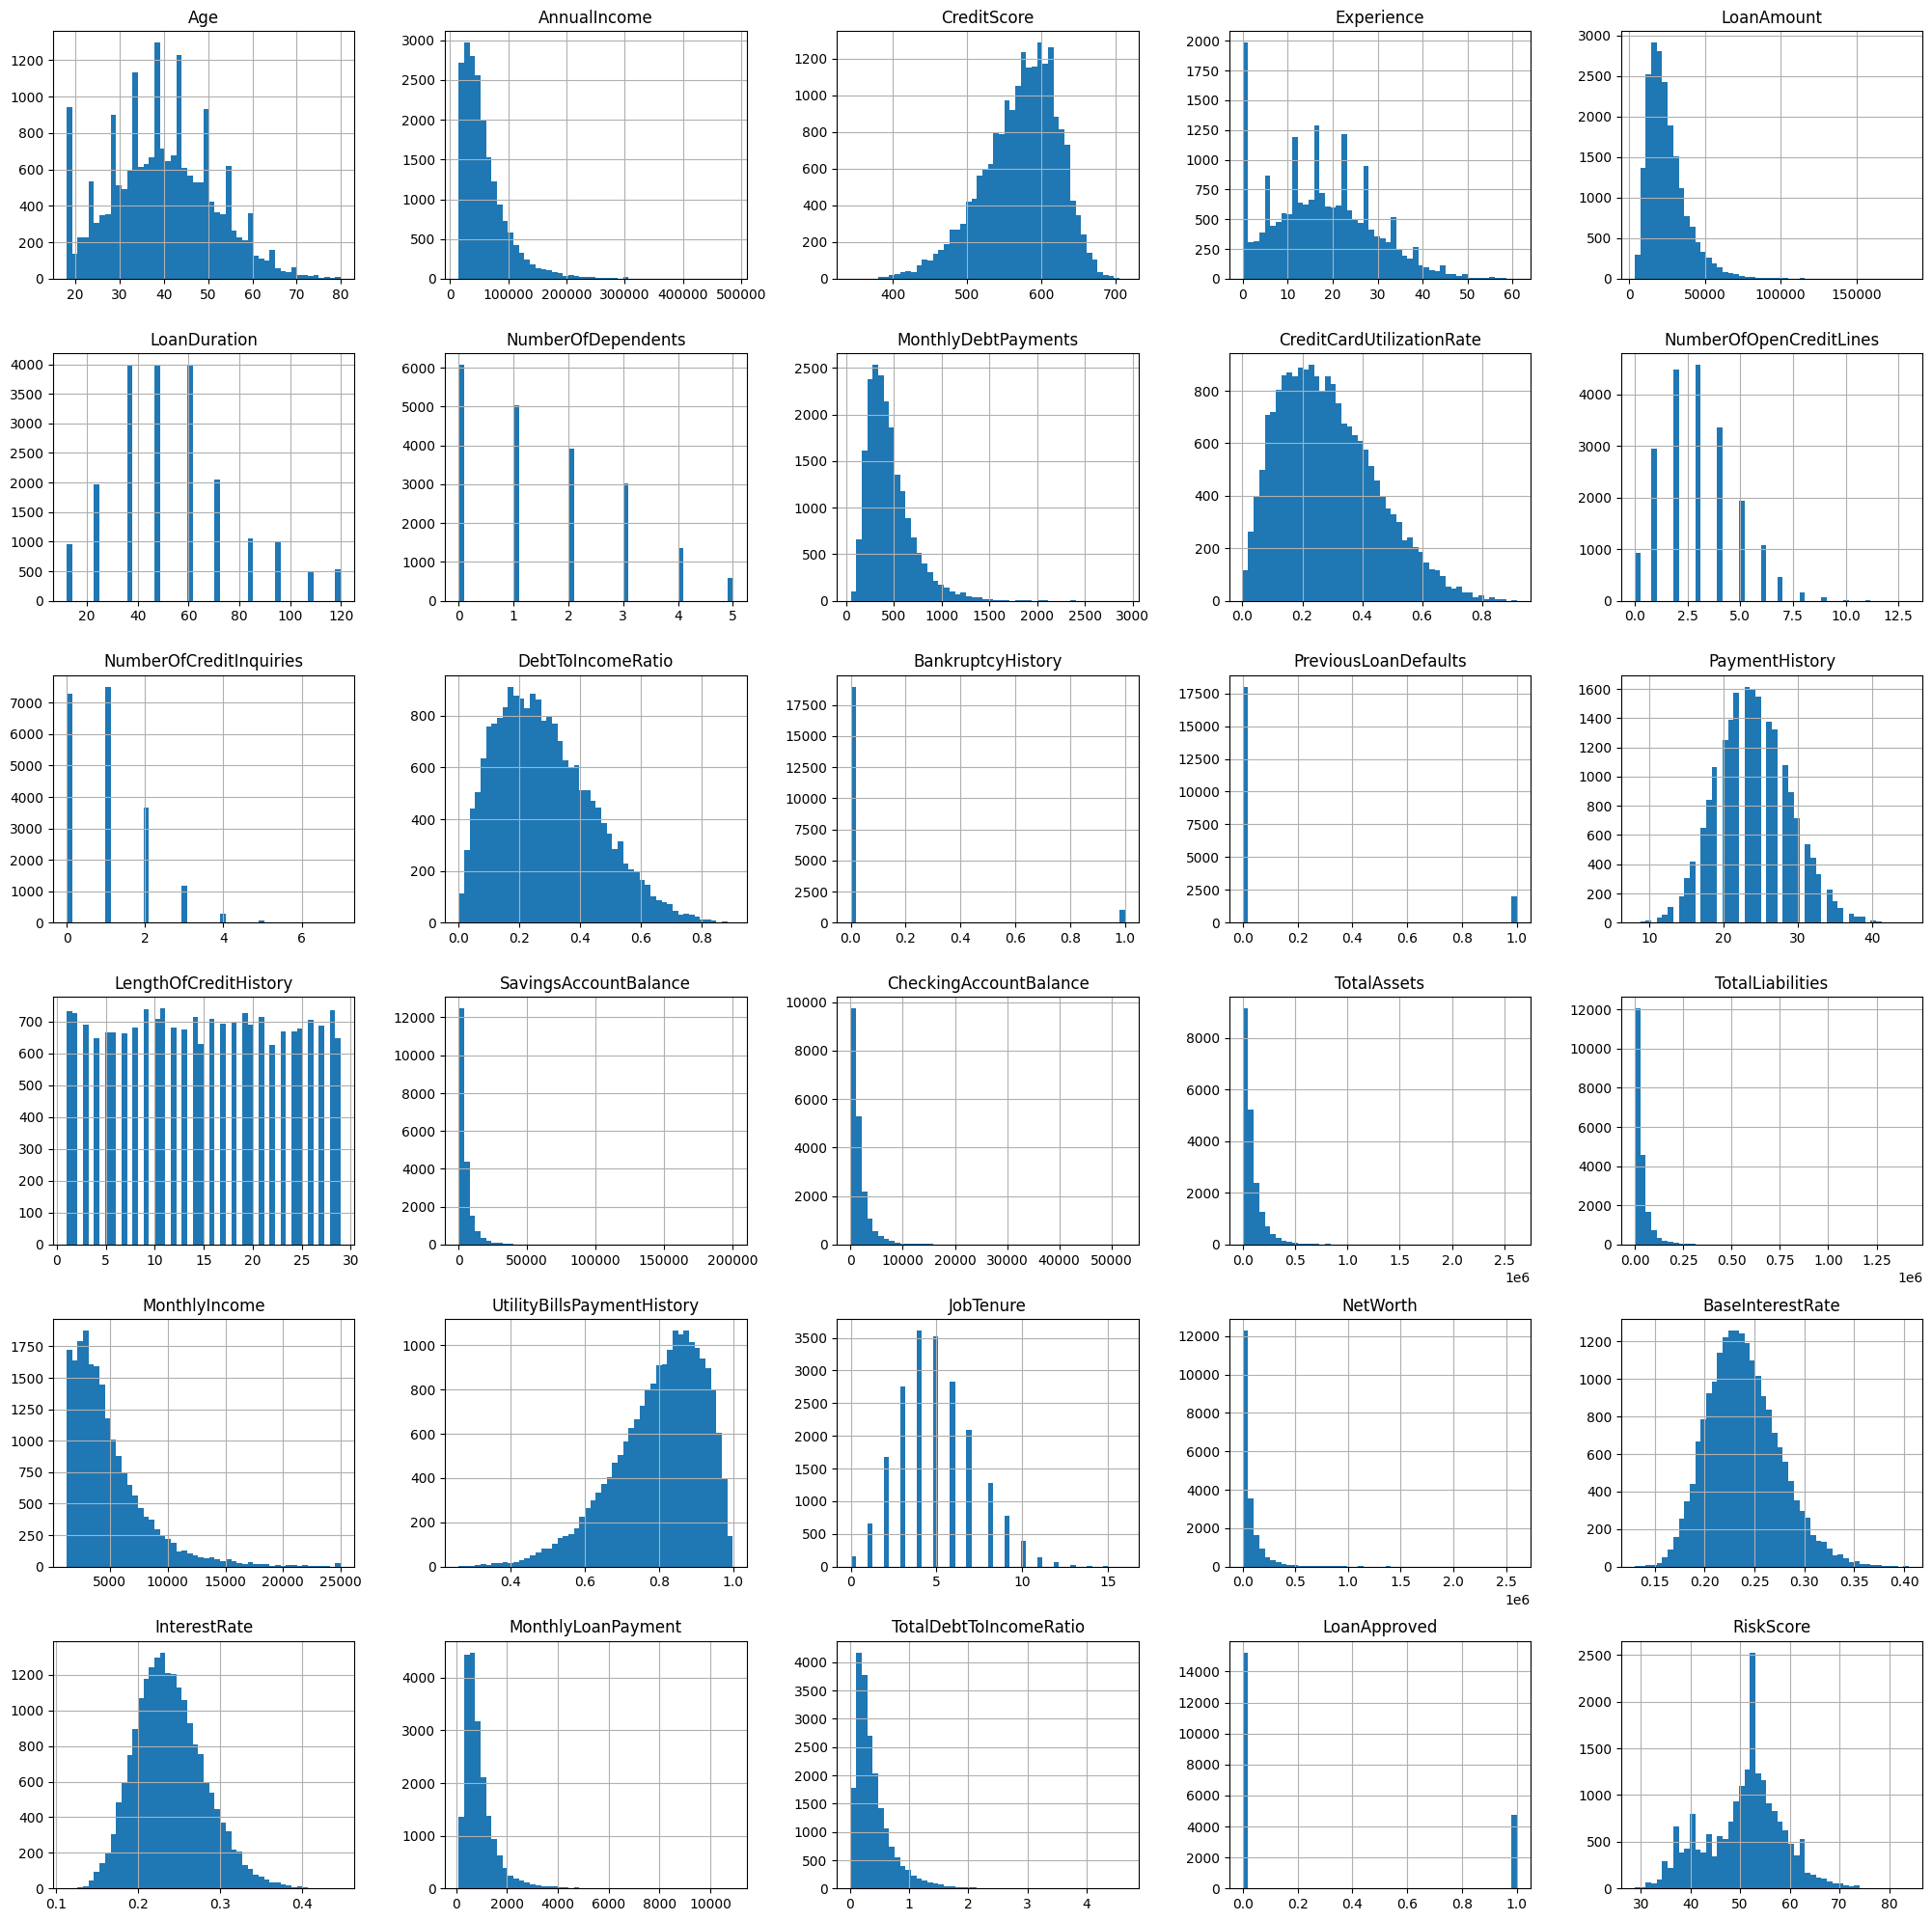

In [6]:
loan_data.hist(figsize=(25,25), bins=50)
plt.show()

# Notes
# Looks like Bankruptcy, PreviousLoanDefaults and LoanApprove are categorical

In [31]:
# Separating numerical and categorical features
test_categorical_data = loan_data.select_dtypes(include=['object'])

# Add ["BankruptcyHistory", "PreviousLoanDefaults", "LoanApproved"] to categorical data
test_categorical_data = pd.concat([test_categorical_data, loan_data[["BankruptcyHistory", "PreviousLoanDefaults", "LoanApproved"]]], axis=1)

# Dropping ApplicationDate because it is not uselesssssss
test_categorical_data = test_categorical_data.drop(columns=["ApplicationDate"])

# Separating numerical and categorical features
test_numerical_data = loan_data.select_dtypes(include=['int64', 'float64'])

# Drop ["BankruptcyHistory", "PreviousLoanDefaults", "LoanApproved"] from numerical data
test_numerical_data = test_numerical_data.drop(columns=["BankruptcyHistory", "PreviousLoanDefaults", "LoanApproved"])

In [32]:
test_categorical_data.info()
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmploymentStatus      20000 non-null  object
 1   EducationLevel        20000 non-null  object
 2   MaritalStatus         20000 non-null  object
 3   HomeOwnershipStatus   20000 non-null  object
 4   LoanPurpose           20000 non-null  object
 5   BankruptcyHistory     20000 non-null  int64 
 6   PreviousLoanDefaults  20000 non-null  int64 
 7   LoanApproved          20000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [33]:
test_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   Experience                  20000 non-null  int64  
 4   LoanAmount                  20000 non-null  int64  
 5   LoanDuration                20000 non-null  int64  
 6   NumberOfDependents          20000 non-null  int64  
 7   MonthlyDebtPayments         20000 non-null  int64  
 8   CreditCardUtilizationRate   20000 non-null  float64
 9   NumberOfOpenCreditLines     20000 non-null  int64  
 10  NumberOfCreditInquiries     20000 non-null  int64  
 11  DebtToIncomeRatio           20000 non-null  float64
 12  PaymentHistory              20000 non-null  int64  
 13  LengthOfCreditHistory       200

In [34]:
# Categorical DEA Start ------------------------------------------------------------------------- 

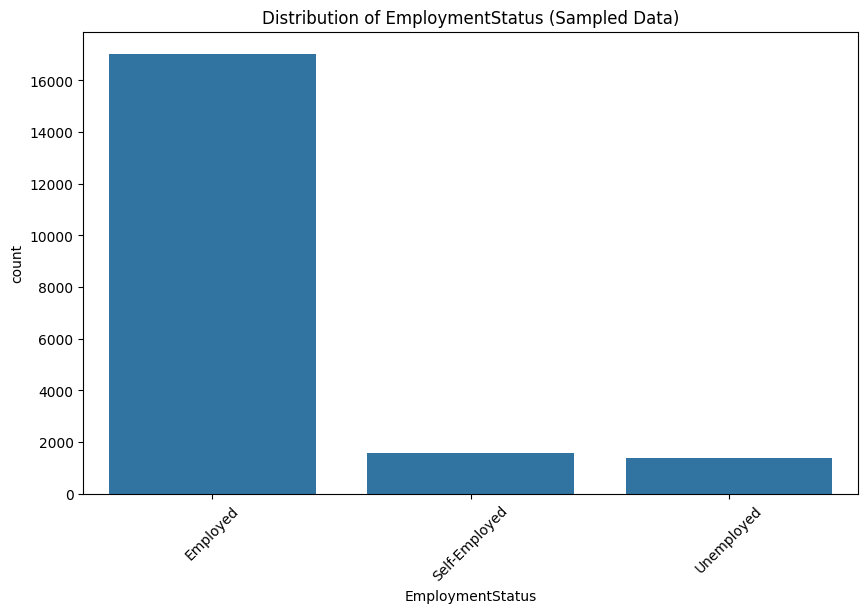

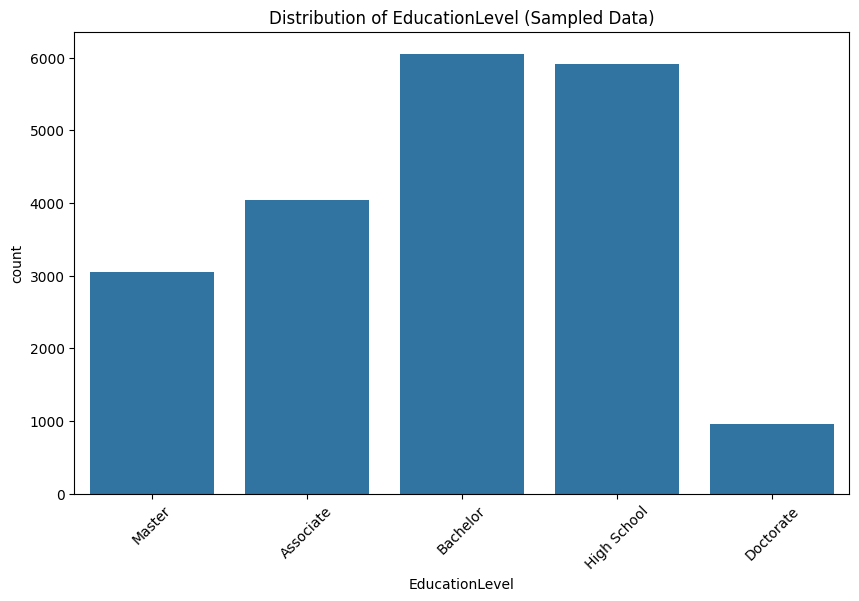

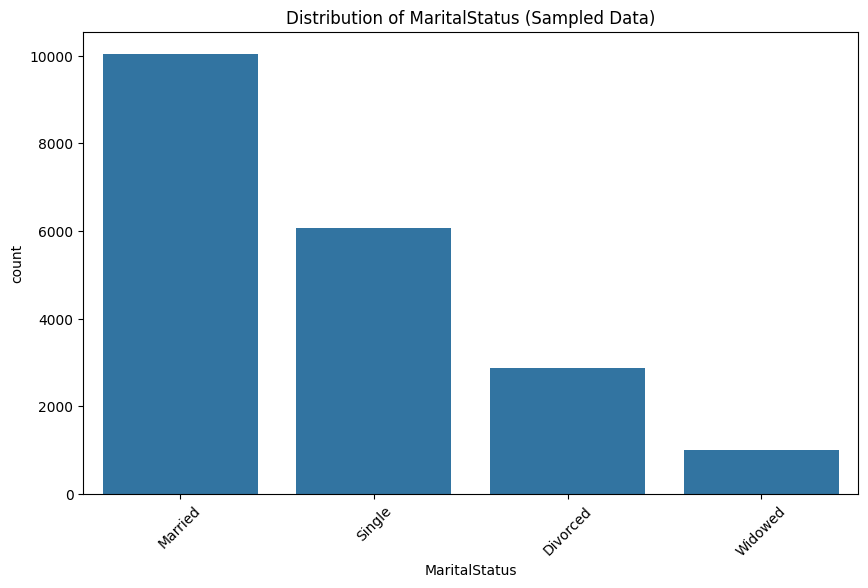

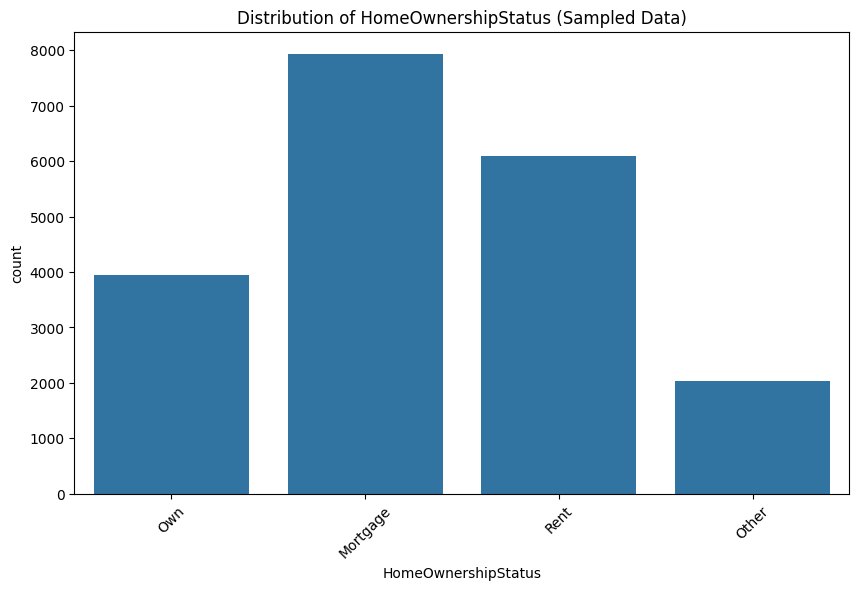

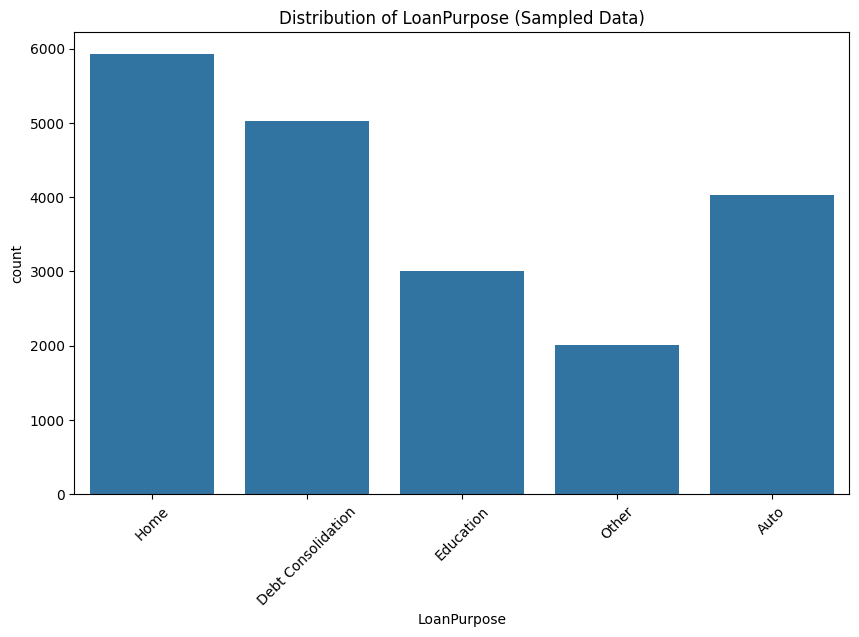

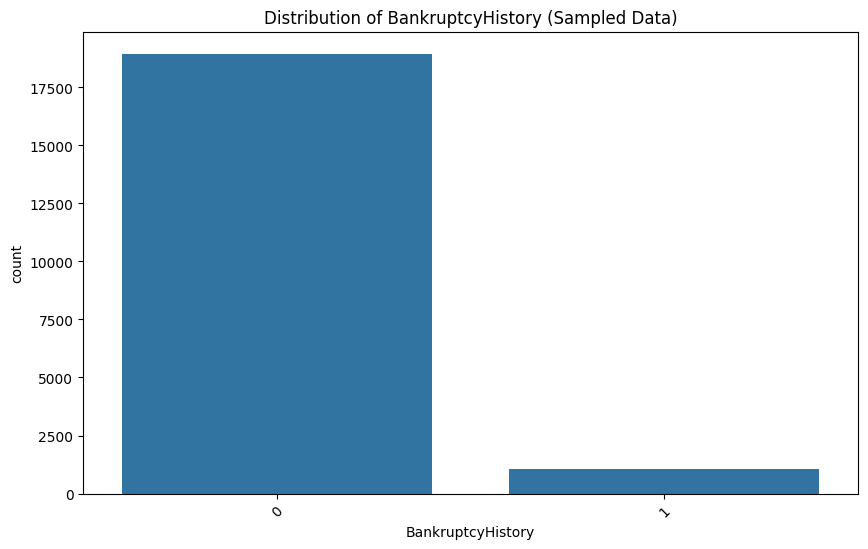

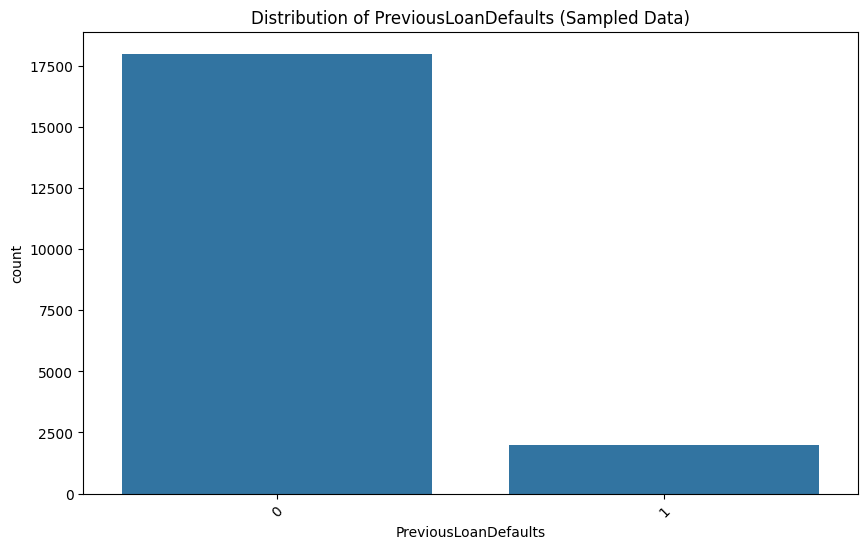

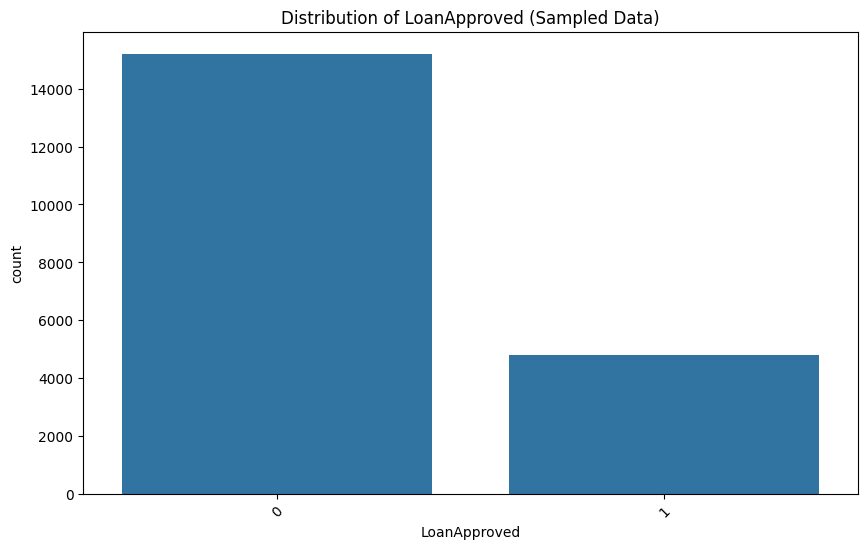

In [35]:
for feature in test_categorical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=test_categorical_data)
    plt.title(f'Distribution of {feature} (Sampled Data)')
    plt.xticks(rotation=45)
    plt.show()


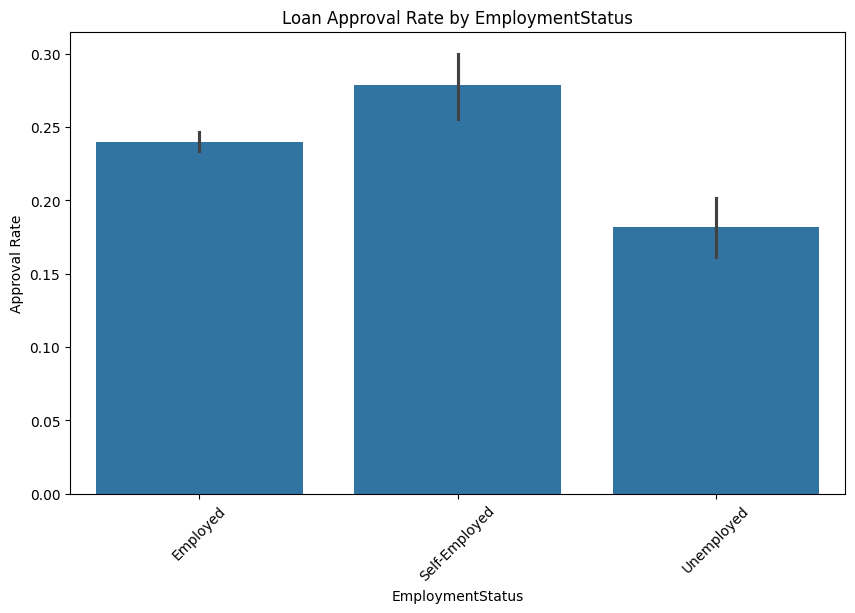

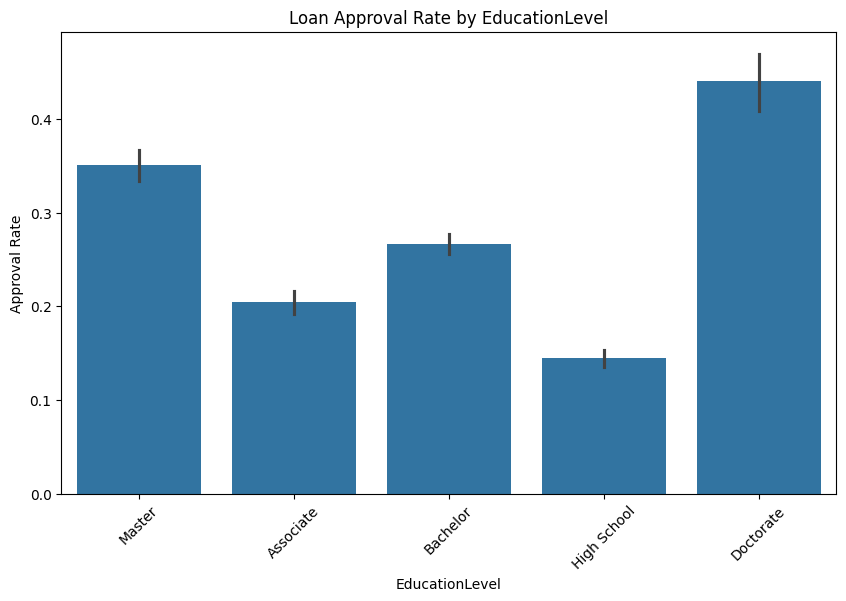

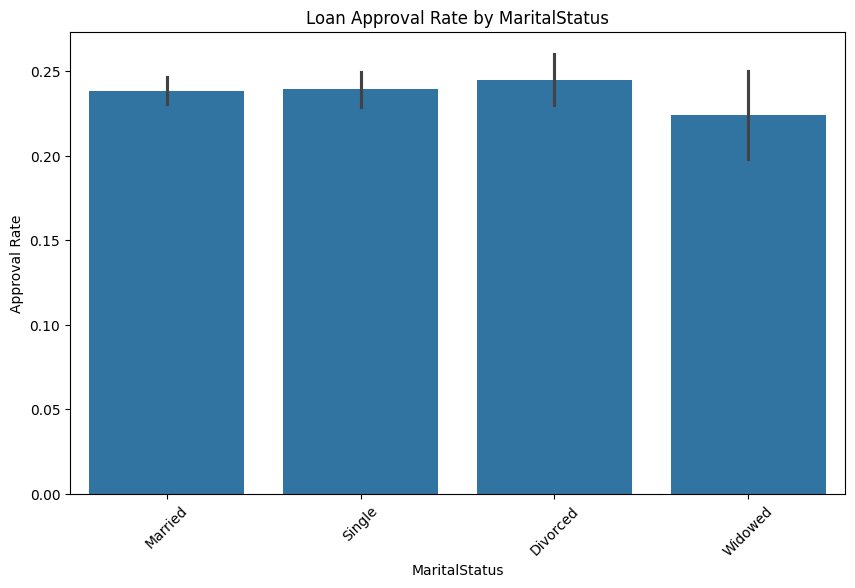

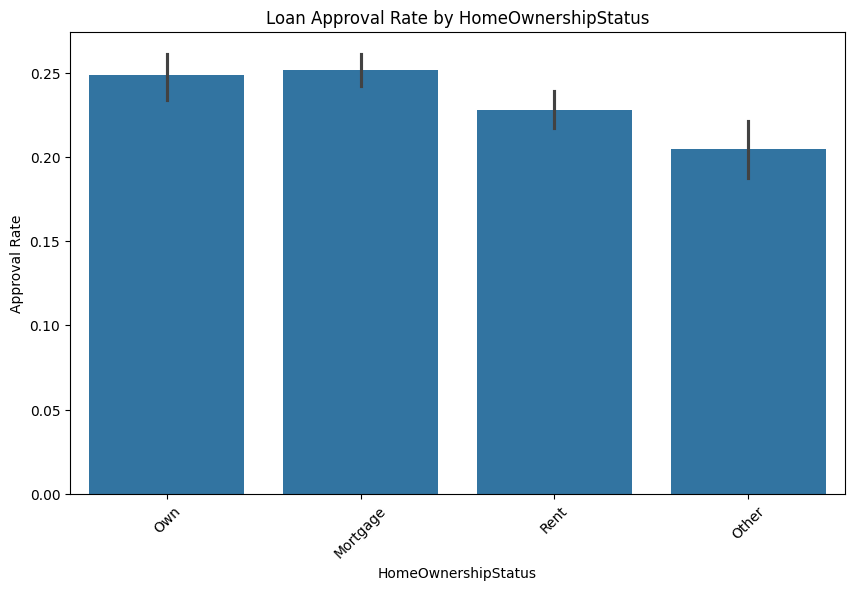

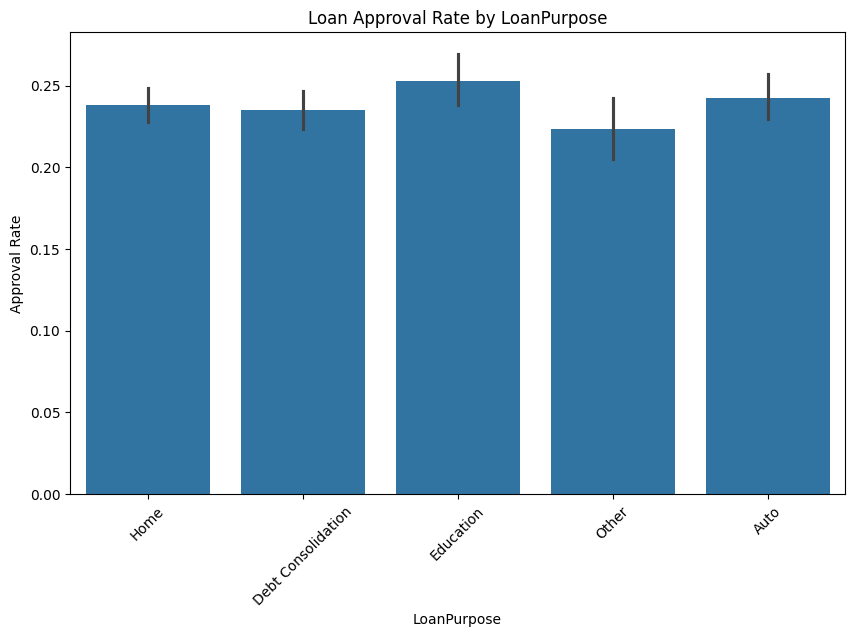

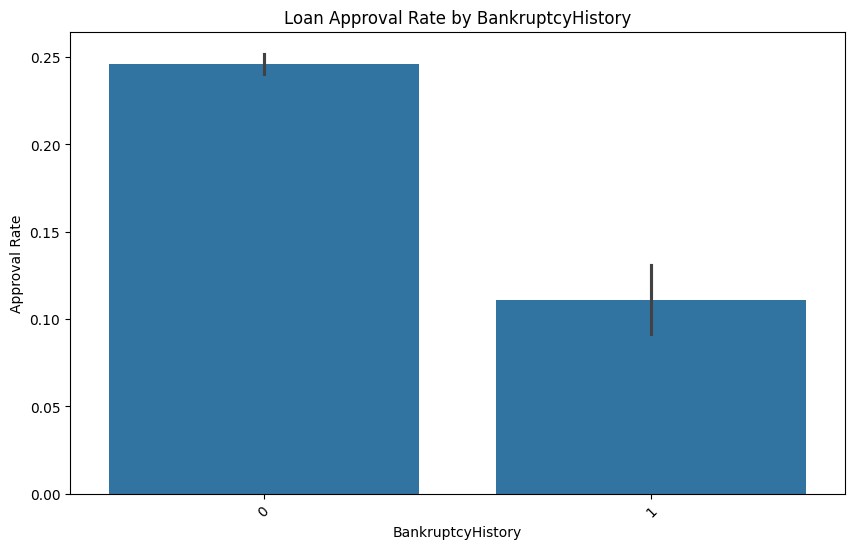

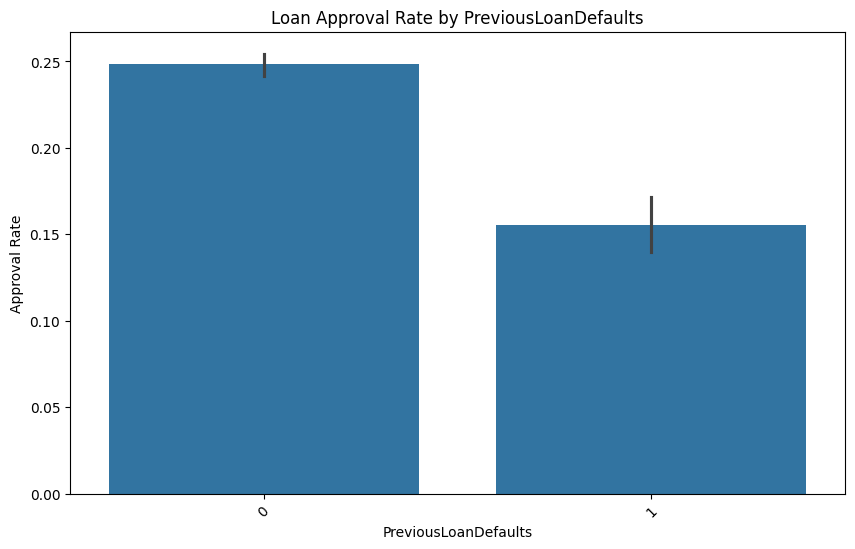

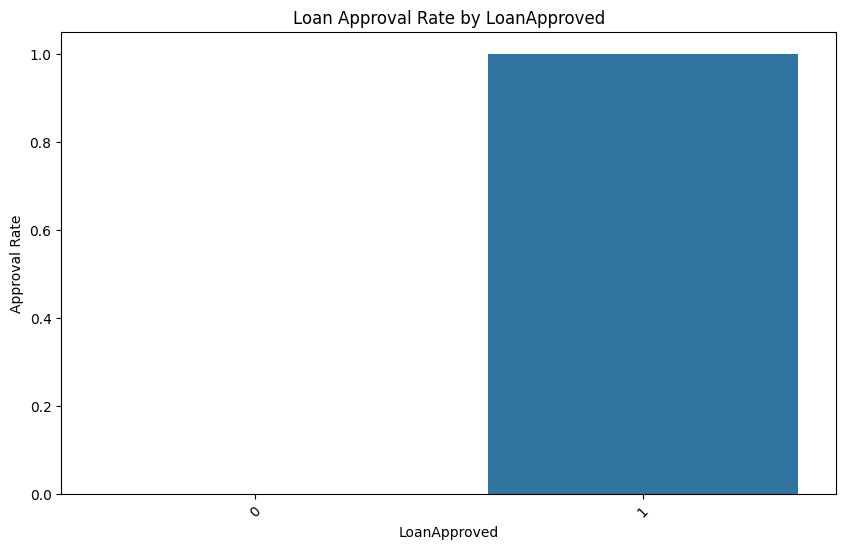

In [37]:
# Bar plot for each categorical feature vs LoanApproved
for feature in test_categorical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='LoanApproved', data=loan_data)
    plt.title(f'Loan Approval Rate by {feature}')
    plt.xticks(rotation=45)
    plt.ylabel('Approval Rate')
    plt.show()
    
    
    # NOTES
    # EmploymentStatus, EducationLevel, BankruptcyHistory, PerviousLoanDefaults seem to be the most important features in the categorical data


In [39]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical feature
for feature in test_categorical_data.columns:
    cross_tab = pd.crosstab(loan_data[feature], loan_data['LoanApproved'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 Stat: {chi2}, P-Value: {p}")
    print('-' * 50)
    
    
    # Notes the Chi-Square does confirm that EmploymentStatus, EducationLevel, BankruptcyHistory, PerviousLoanDefaults. Especially the EducationLevel and BankruptcyHistory
  

Chi-Square Test for EmploymentStatus:
Chi2 Stat: 38.506519961609214, P-Value: 4.349260610875047e-09
--------------------------------------------------
Chi-Square Test for EducationLevel:
Chi2 Stat: 764.7553445721173, P-Value: 3.3045607434476096e-164
--------------------------------------------------
Chi-Square Test for MaritalStatus:
Chi2 Stat: 1.781340751519077, P-Value: 0.619003790952251
--------------------------------------------------
Chi-Square Test for HomeOwnershipStatus:
Chi2 Stat: 26.32882770103285, P-Value: 8.138932140772307e-06
--------------------------------------------------
Chi-Square Test for LoanPurpose:
Chi2 Stat: 6.6957460996361515, P-Value: 0.15286711286480661
--------------------------------------------------
Chi-Square Test for BankruptcyHistory:
Chi2 Stat: 99.37089220053313, P-Value: 2.093774032397644e-23
--------------------------------------------------
Chi-Square Test for PreviousLoanDefaults:
Chi2 Stat: 84.88410177613264, P-Value: 3.163768177603563e-20
-----

In [42]:
# Conlusion
# The categorical features that are most important are EmploymentStatus, EducationLevel, BankruptcyHistory, PerviousLoanDefaults

test_categorical_data = test_categorical_data.drop(columns=["EmploymentStatus", "EducationLevel"])

In [43]:
# Categorical DEA End -------------------------------------------------------------------------